In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(viridis)
library(scales)
library(RColorBrewer)
library(parallel)
library(purrr)
library(ggplot2)
library(igraph)
library(ggraph)
library(colormap)
library(rstatix)
library(corrplot)
library(GGally)
options(warn=-1)

mid_rescaler <- function(mid = 0) {
  function(x, to = c(0, 1), from = range(x, na.rm = TRUE)) {
    scales::rescale_mid(x, to, from, mid)
  }
}
cor.mtest <- function(mat, conf.level = 0.95) {
  mat <- as.matrix(mat)
  n <- ncol(mat)
  p.mat <- matrix(NA, n, n)
  diag(p.mat) <- 0
  for (i in 1:(n - 1)) {
    for (j in (i + 1):n) {
      tmp <- cor.test(mat[, i], mat[, j], 
                      method='spearman',
                      conf.level = conf.level)
      p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
    }
  }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}

Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal



Attaching package: ‘purrr’


The following object is masked from ‘package:scales’:

    discard



Attaching package: ‘igraph’


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tibble’:

    as_data_frame


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


corrplot 0.85 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
SF4_data<-read.csv("01_Get_Metrics/SF4_Tcell_data_forcorrelation.csv",check.names = FALSE)


In [3]:
correlation_tests <- SF4_data %>% select(NMF_Th2,InteractionScore_CD40LG_CD40) %>% 
  dplyr::summarise(
    correlation = cor( NMF_Th2,InteractionScore_CD40LG_CD40	, method = 'spearman', use = "pairwise.complete.obs"),
    p_value = cor.test(InteractionScore_CD40LG_CD40	, NMF_Th2, method = 'spearman')$p.value
  )

In [4]:
correlation_tests

correlation,p_value
<dbl>,<dbl>
-0.1669278,0.01070233


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


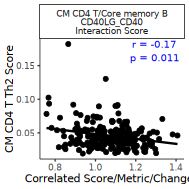

In [20]:
options(repr.plot.width = 40/25.4, repr.plot.height =40/25.4)

SF4_data$Variable<-'InteractionScore_CD40LG_CD40'

p <- ggplot(data = SF4_data %>% select(NMF_Th2,InteractionScore_CD40LG_CD40,Variable),
            aes(x = InteractionScore_CD40LG_CD40, y = NMF_Th2)) +
  geom_point(size = 1, stroke = 0.25) +
  geom_smooth(method = 'lm', color = "black", se = FALSE, linewidth = 0.5) +
  facet_wrap(~ Variable, scales = "free_x", labeller = labeller(Variable = c(
      "InteractionScore_CD40LG_CD40" = "CM CD4 T/Core memory B\nCD40LG_CD40\nInteraction Score"

  ))) +
  theme_classic(base_size = 6) +
  ylab('CM CD4 T Th2 Score') +
  xlab('Correlated Score/Metric/Changes') +
  geom_text(
    data = correlation_tests,
    aes(
      x = Inf, y = Inf,
      label = paste("r =", round(correlation, 2), "\np =", format.pval(p_value, digits = 2, eps = 0.001)),
      hjust = 1.1, vjust = 1.1
    ),
    inherit.aes = FALSE,
    size = 2,
    color = "blue")+theme(
          panel.border = element_blank())+
  theme(
    strip.background = element_rect(colour = "black", size = 0.15),
          axis.line = element_line(size = 0.15)  # Adjust the size for both x and y axis
  )
print(p)
ggsave("FigureC.pdf",p, width=40/25.4,height = 40/25.4)